In [1]:
import matplotlib.pyplot as plt

import numpy as np
from numpy import sin,cos
from scipy.integrate import solve_ivp

#  Atomic Coherence in E-Mag Field (Dr Blokhina's Model)

### Define system constants:

### Define system DEs as function:

In [2]:
omega = 4
Lambda = 4

In [3]:
def quantum_model(t, x):    
        
    return [
        -omega*Lambda* (x[0]*x[2])**0.5 *cos(x[3])*(sin(x[1])),  # d(I_e)/dt
        omega -0.5*omega*Lambda* (x[2]/x[0])**0.5 *(cos(x[3])*cos(x[1])),  # d(phi_e)/dt
        2*omega*x[4]*Lambda* (x[0]*x[2])**0.5 *(cos(x[1])*sin(x[3])),  # d(I_m)/dt
        omega*x[4]*Lambda* (x[0]/x[2])**0.5 *(cos(x[3])*cos(x[1])),  # d(phi_m)/dt
        -Lambda* (x[0]*x[2])**0.5 *(cos(x[1])*sin(x[3]))  # d(n)/dt
    ]

### Define time range and initial conditions:

In [4]:
dt = 0.001
t_test = np.arange(0,100,dt)
X0 = [0.5, 0.5, 0.5, 0.5, 1]

### Solve our equations using solve_ivp

In [5]:
sol = solve_ivp(quantum_model, (t_test[0], t_test[-1]), X0, method='BDF', t_eval=t_test) # Integrate
x_test = np.transpose(sol.y)

### Plot:

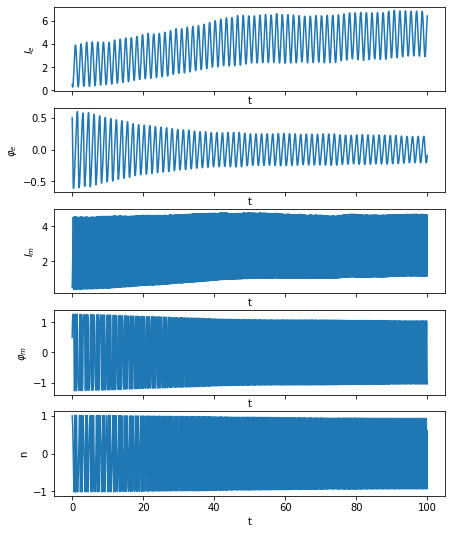

In [6]:
fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7,9))
plt.rc('axes', labelsize=15)
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_test[:, i])
    axs[i].set(xlabel='t', ylabel=['$I_e$','$\u03C6_e$','$I_m$','$\u03C6_m$', 'n'][i])
    #axs[i].set_xlim(8,9)


### 3D plotting of variables against eachother

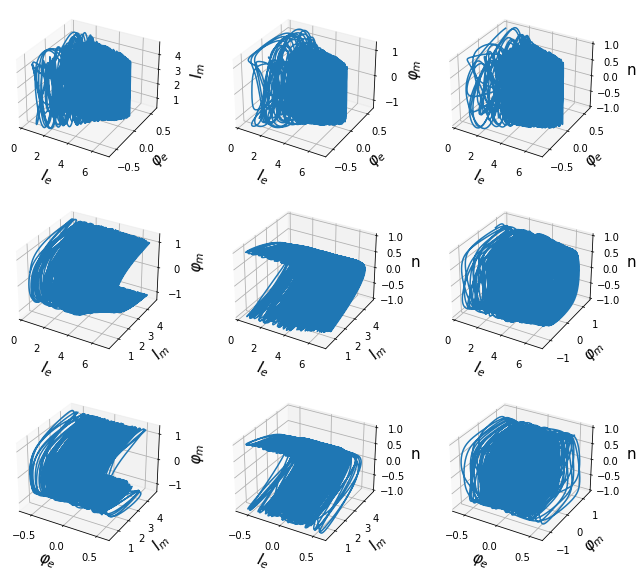

In [7]:
fig = plt.figure(figsize= (11, 10))

ax1 = fig.add_subplot(331, projection='3d')
ax1.plot(x_test[:, 0], x_test[:, 1], x_test[:, 2])
ax1.set(xlabel='$I_e$', ylabel='$\u03C6_e$', zlabel='$I_m$')

ax2 = fig.add_subplot(332, projection='3d')
ax2.plot(x_test[:, 0], x_test[:, 1], x_test[:, 3])
ax2.set(xlabel='$I_e$', ylabel='$\u03C6_e$', zlabel='$\u03C6_m$')

ax3 = fig.add_subplot(333, projection='3d')
ax3.plot(x_test[:, 0], x_test[:, 1], x_test[:, 4])
ax3.set(xlabel='$I_e$', ylabel='$\u03C6_e$', zlabel='n')

ax4 = fig.add_subplot(334, projection='3d')
ax4.plot(x_test[:, 0], x_test[:, 2], x_test[:, 3])
ax4.set(xlabel='$I_e$', ylabel='$I_m$', zlabel='$\u03C6_m$')

ax5 = fig.add_subplot(335, projection='3d')
ax5.plot(x_test[:, 0], x_test[:, 2], x_test[:, 4])
ax5.set(xlabel='$I_e$', ylabel='$I_m$', zlabel='n')

ax6 = fig.add_subplot(336, projection='3d')
ax6.plot(x_test[:, 0], x_test[:, 3], x_test[:, 4])
ax6.set(xlabel='$I_e$', ylabel='$\u03C6_m$', zlabel='n')

ax7 = fig.add_subplot(337, projection='3d')
ax7.plot(x_test[:, 1], x_test[:, 2], x_test[:, 3])
ax7.set(xlabel='$\u03C6_e$', ylabel='$I_m$', zlabel='$\u03C6_m$')

ax8 = fig.add_subplot(338, projection='3d')
ax8.plot(x_test[:, 1], x_test[:, 2], x_test[:, 4])
ax8.set(xlabel='$I_e$', ylabel='$I_m$', zlabel='n')

ax9 = fig.add_subplot(339, projection='3d')
ax9.plot(x_test[:, 1], x_test[:, 3], x_test[:, 4])
ax9.set(xlabel='$\u03C6_e$', ylabel='$\u03C6_m$', zlabel='n');

#ax9 = fig.add_subplot(339, projection='3d')
#ax9.plot(x_test[:, 2], x_test[:, 3], x_test[:, 4])
#ax9.set(xlabel='$I_m$', ylabel='$\u03C6_m$', zlabel='n');

<IPython.core.display.Javascript object>


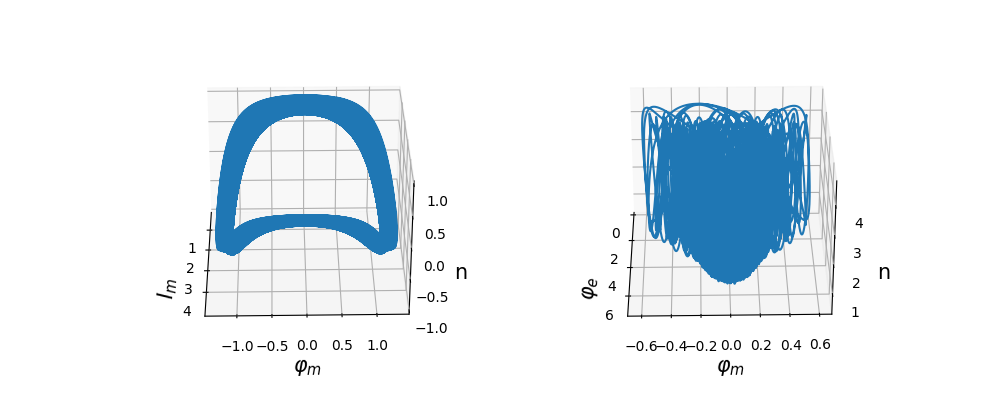

In [8]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x_test[:, 2], x_test[:, 3], x_test[:, 4])
ax1.set(xlabel='$I_m$', ylabel='$\u03C6_m$', zlabel='n');

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x_test[:, 0], x_test[:, 1], x_test[:, 2])
ax2.set(xlabel='$\u03C6_e$', ylabel='$\u03C6_m$', zlabel='n')

# Create an rotatable 3D plot: 
for angle in range(0, 360):
    ax1.view_init(30, angle)
    ax2.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

### 2D plotting of variables against eachother

In [9]:
'''
fig, axs = plt.subplots(3, 2, figsize=(10,10))
plt.rc('axes', labelsize=15)

axs[0,0].plot(x_test[:,1], x_test[:, 0])
axs[0,0].set(xlabel='$\u03C6_e$', ylabel='$I_e$')

axs[0,1].plot(x_test[:,3], x_test[:, 2])
axs[0,1].set(xlabel='$\u03C6_m$', ylabel='$I_m$')

axs[1,0].plot(x_test[:,0], x_test[:, 2])
axs[1,0].set(xlabel='$I_e$', ylabel='$I_m$')

axs[1,1].plot(x_test[:,1], x_test[:, 3])
axs[1,1].set(xlabel='$\u03C6_e$', ylabel='$\u03C6_m$')

axs[2,0].plot(x_test[:,0], x_test[:, 4])
axs[2,0].set(xlabel='$I_e$', ylabel='n')

axs[2,1].plot(x_test[:,2], x_test[:, 4])
axs[2,1].set(xlabel='$I_m$', ylabel='n')


fig.tight_layout(h_pad=2)

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_34068/3422110163.py, line 24)